# Linear Regression in Practice

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

**Note**: the exercises are inline in this notebook and *not* at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

The main objectives of this laboratory are:
+ For you to gain familiarity with using Python for numerical programming in Jupyter Notebooks, Google Colaboratory, or *[INSERT TOOL OF CHOICE]*.
+ For you to gain familiarity with working with data in Numpy, Pandas, and Scikit-learn.
+ For you to learn how to use *visualization* as a tool for understanding the nature of machine learning problems and gain insight into potential solutions.
+ To learn to use Scikit-learn to solve simple univariate regression problems and validate your solutions.
+ To learn the value of *encapsulation* and *abstraction* of pipeline code for making experiments *reproducible*.

---
---

# CODE OF CONDUCT V1.0

This Code of Conduct outlines principles for the ethical and transparent use of Large Language Models (LLMs) and existing and internet resources, ensuring integrity and accountability in your laboratory submissions. This first version of the FML Laboratory Code of Conduct was developed in a brainstorming session with **ChatGPT Version 2**, modifying its proposal to the specifics of the FML Laboratories and concentrating on the transparent collaboration with classmates and transparent use of LLMs.

#### **1. Transparency in LLM Use**
- **Clear Disclosure:** Explicitly state when Large Language Models (LLMs) are used in any part of the process, including data analysis, code generation, or writing.
- **Model Limitations:** Acknowledge the inherent limitations of LLMs, such as potential biases, and make clear where human intervention was applied to verify results or to modify/augment produced code.

#### **2. Proper Attribution and Documentation**
- **Attribution:** Provide appropriate citations and credits for all external resources, including code, data, and models.
- **Clear Documentation:** Maintain detailed records of tools, methods, and models used, ensuring transparency and reproducibility in your submitted laboratory solutions.

#### **3. Collaboration and Individual Work**
- **Sharing Solutions:** While collaboration and discussing ideas with classmates are encouraged, solutions to assignments or projects should be your own. Do not copy or submit work created by others, including code or models, as your own.
- **Submission Integrity:** All submitted work must reflect your own understanding and effort. If external tools, LLMs, online resources, or code from your classmates were used, they must be properly documented, but the final submission must be an individual effort.

#### **4. Accountability**
Non-compliance with these guidelines will be subject to review by the course exam commission, with possible disciplinary actions.

---
---

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!

### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we *play* with the data first in order to get a better understanding of it.

In [2]:
# Initial imports -- these are fairly standard.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the function that will download the dataset.
from sklearn.datasets import fetch_california_housing

# Load the sklearn version of the California Housing dataset.
ds = fetch_california_housing()

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?

In [3]:
# Your code here.

print(ds.keys())
print(ds.DESCR)
print(ds.data.shape)   
print(ds.feature_names)
print(ds.target.shape)
print(ds.target_names)
print(ds.data)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

**Your Analysis**: We have a regression problem (see documentation in 'ds.DESCR') with 8 indipendent input varianles (see names in 'ds.feature_name') ad a single dependent target (see 'ds.target_names'). The dataset contains 20k+ rows pf samples, our goal is to estimate the median house value for California housing distrincts from the given household variables.

scrivere ciò che si scopre via via.

### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [4]:
# Create a Pandas DataFrame for our dataset and a Pandas Series for the targets.

# Your code to build the DataFrame here (replace None)
df = pd.DataFrame(data = ds.data, columns = ds.feature_names)
print(df)

# Your code to build the target Series here (replace None)
targets = pd.Series(ds.target)
print(targets)

#pandas serve per creare delle righe e colonne con i dati che abbiamo dandogli un nome

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

### Exercise 1c: Examining the Data

Study the *descriptive statistics* of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.

In [5]:
# Your code here.
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


**Your Analysis Here** (in Markdown).
We do not have any missing values, most features are in the $\mathcal(0)(1)$ ange, with some several orders of magnitude higher (Population, in particular, is in the $\mathcal(0)(1000)$ rage). The variance of input features are generally in range with range with their magnitudes, with the exception of AveOccup which has an elevated variance. 

Non ci sono dati mancanti.

In [6]:
targets.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

**Analysis**: our target variables are distributed reasonably well (at least in the first-and second-order sense), which mean and standard deviation in the same range.

---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Exercise 2a: Visualizing the Target
Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to *histograms*, try out the Seaborn function `distplot`.

<Axes: >

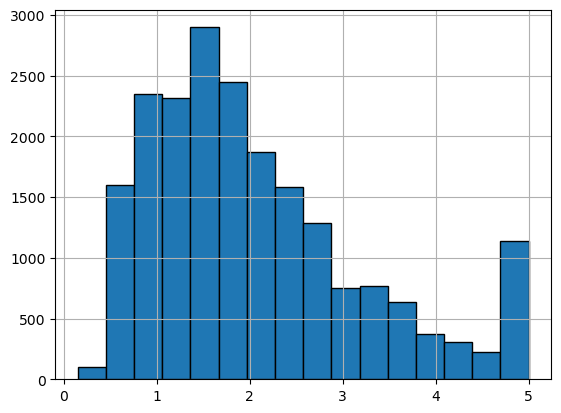

In [7]:
# Your visualization code here.
targets.hist(bins=16, edgecolor='black') #pandas ha un metodo hist che permette di fare un istogramma


mettere un po' di caxzzate
**Your Analysis Here**.

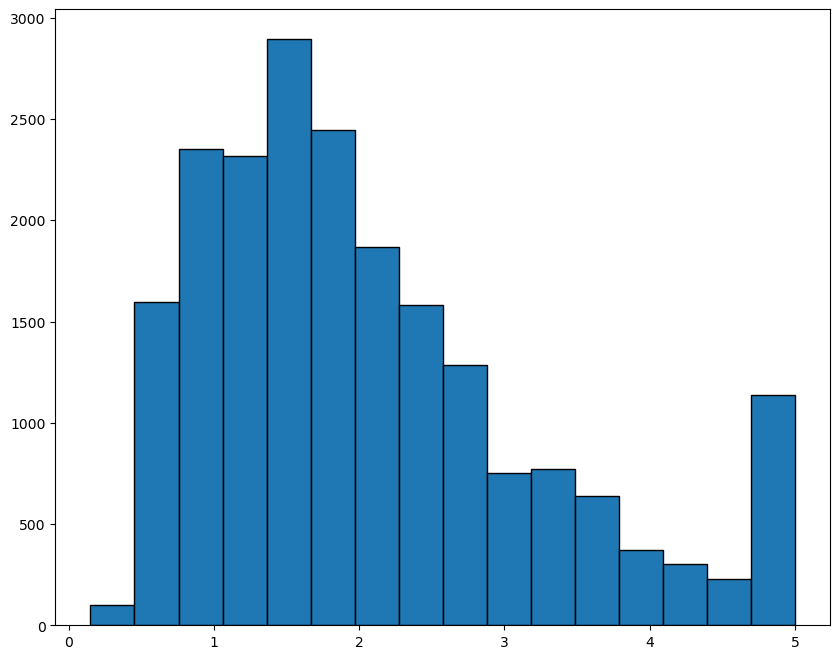

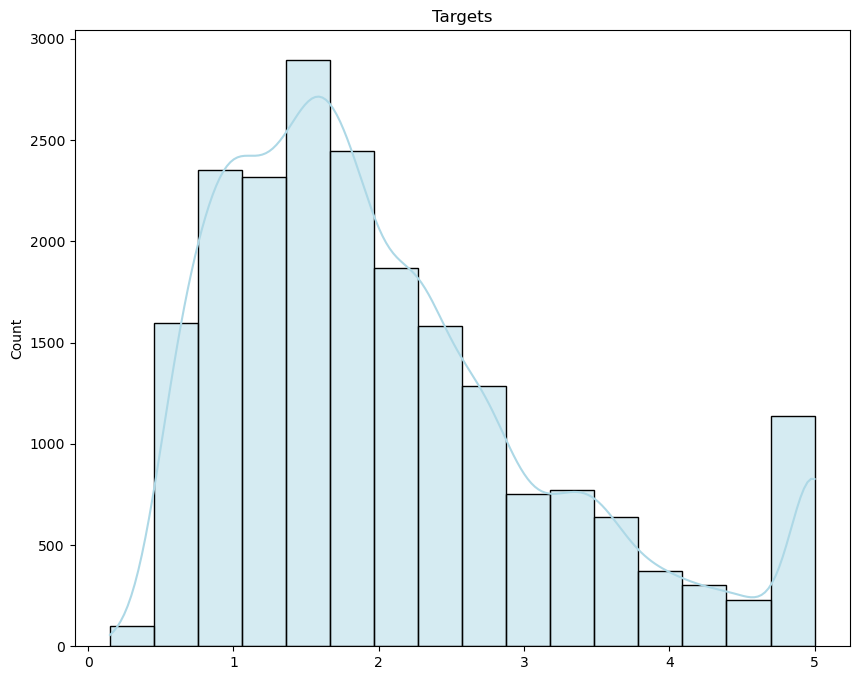

In [8]:
plt.figure(figsize=(10, 8))
plt.hist(targets, bins=16, edgecolor='black')

plt.show()

plt.figure(figsize=(10, 8))
sns.histplot(targets, bins=16, kde=True, color='lightblue')

plt.title('Targets')
plt.show()

**Analysis:** Kind of a skewed Gaussian shape for our target values, with a long-is tail 

### Exercise 2b: Subplots
Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:
+ If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
+ If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
+ Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!


<Axes: >

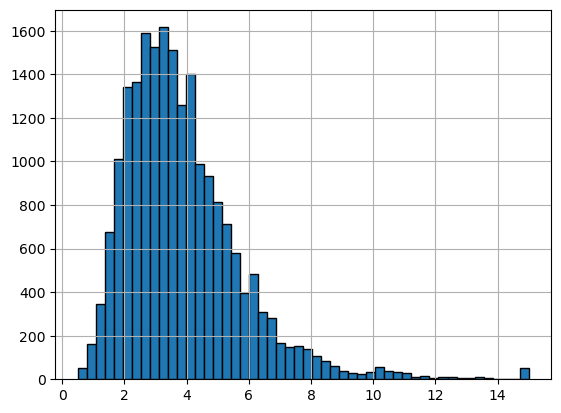

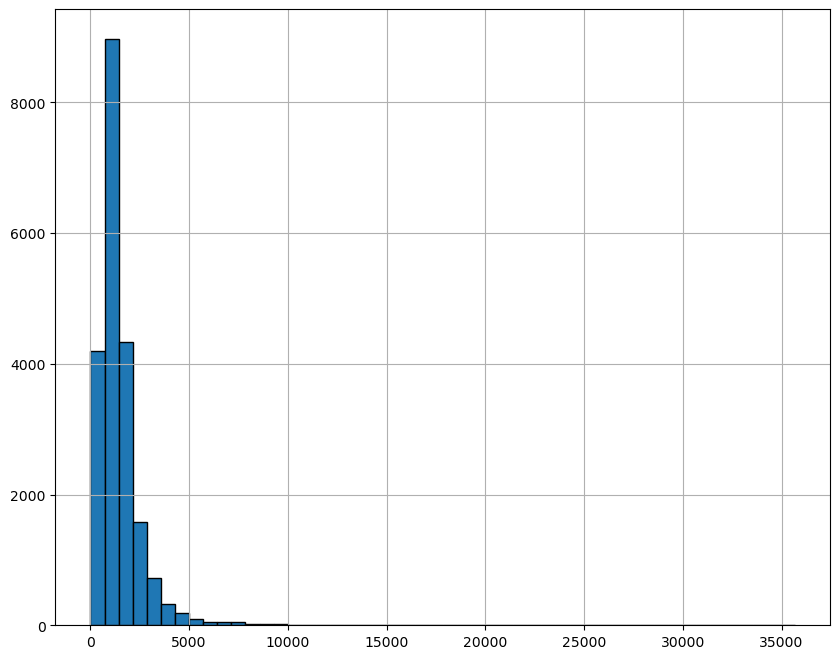

In [9]:
df.MedInc.hist(bins=50, edgecolor='black') 
plt.figure(figsize=(10, 8))
df.Population.hist(bins=50, edgecolor='black') #pandas ha un metodo hist che permette di fare un istogramma

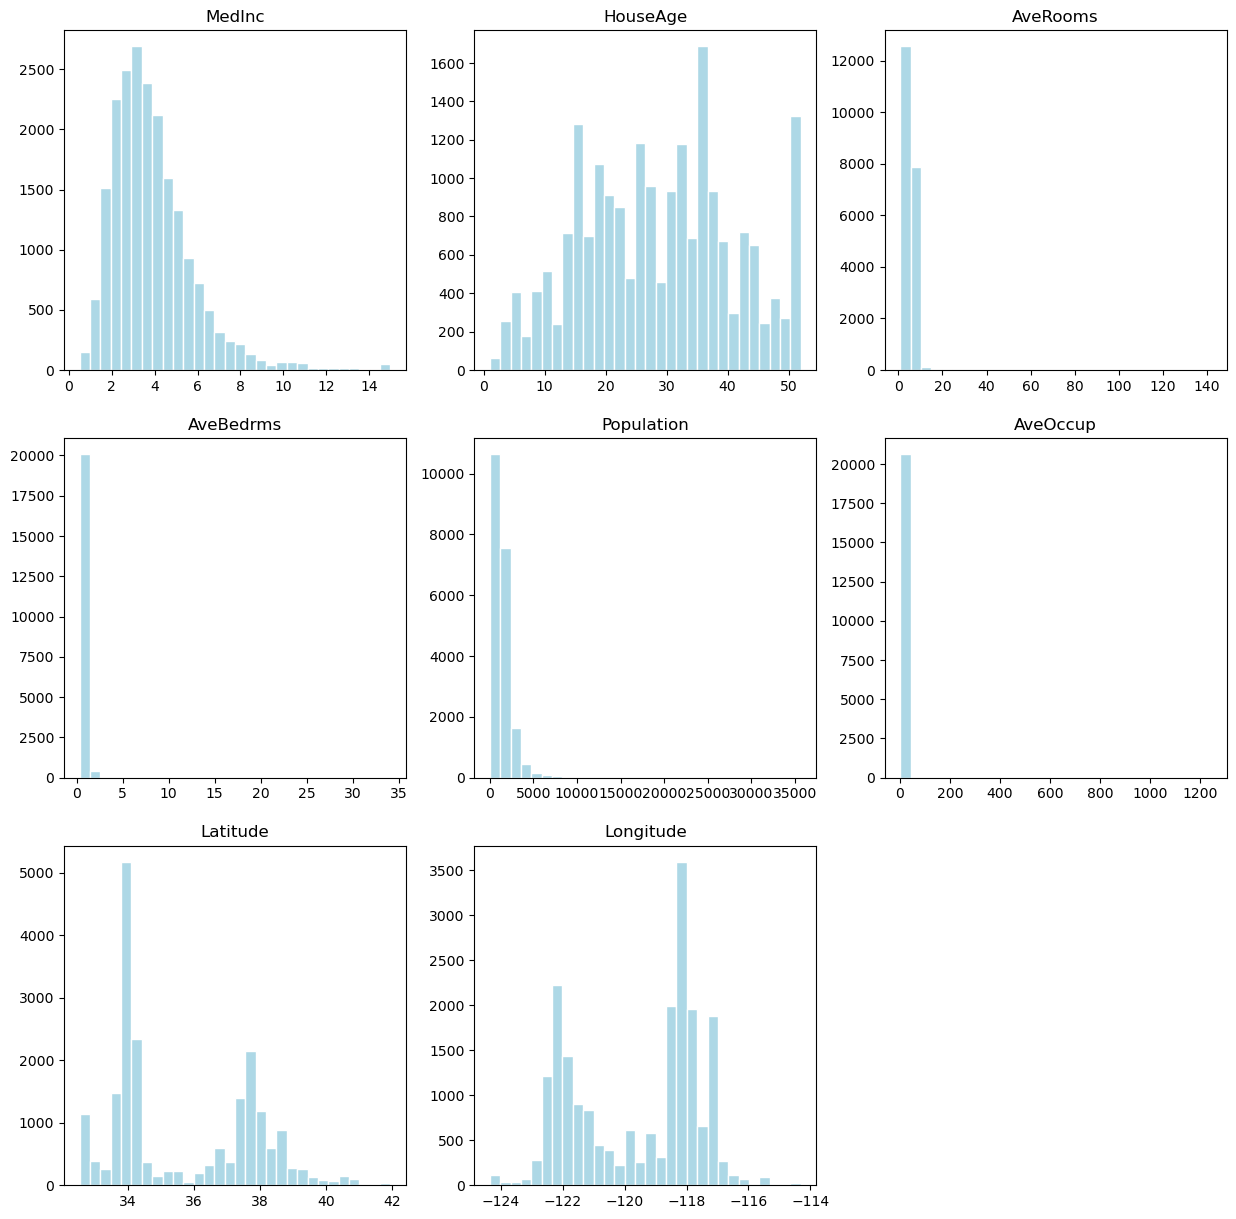

In [10]:
plt.figure(figsize=(15, 15))
for (i, col) in enumerate(df.columns):
    plt.subplot(3, 3, i+1)  # plot on grid 3x3
    plt.hist(df[col], 30, edgecolor='white', color='lightblue')
    plt.title(df[col].name)


**Analysis:** We can see a spike at the start or AveBedrms, Population and AveOccup.
We can use the Pandas methods or the matplotlib function, the result is pretty similar. 

Se l'istogramma è così scalato vuol dire che un valore a dx ci sarà anche in quelli che non si vedono. (mia)

**Analysis:** (prof) Several input features are drammatically skewed due to outliers (this is documented in the ds.DESCR). Other more reasonable, with Gaussian or simple binomial distribution (e.g. Latitude and Longitude). 

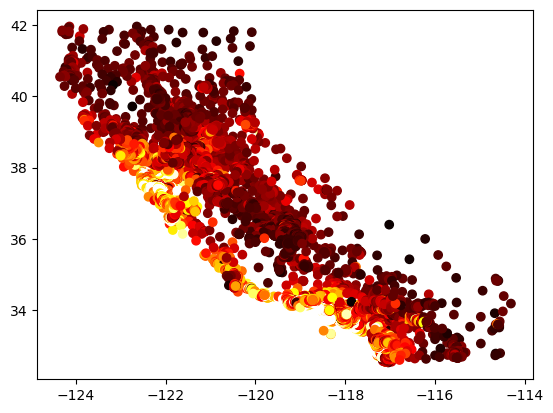

In [11]:
plt.scatter(df.Longitude, df.Latitude, c=targets, cmap='hot') 

**Analysis:** Use covarianza


---
---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split
Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.

In [12]:
# Your code here.
from sklearn.model_selection import train_test_split

# Split data into 75-25 train/test split -- replace the [None]*4 with your code.
(Xtr, Xte, ytr, yte) = train_test_split(df, targets, test_size=0.25) #tutte le volte io cambio i valori che vado a prendere, per evitare questo si può usare un seed

print("Test Set shape:", Xte.shape)
print("Training Set shape:", Xtr.shape)

Test Set shape: (5160, 8)
Training Set shape: (15480, 8)


**Note**: *My* convention for data and label matrices is `Xtr, ytr` (training) and `Xte, yte` (testing) because the `X` and `y` helps link the *code* to the *math*. Start developing your own style to help you organize (and eventually share) your code.

### Exercise 3.2: Fit a LinearRegression
Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


In [13]:
from sklearn.linear_model import LinearRegression

## 1. Creare il modello di regressione lineare
model = LinearRegression()

# 2. Addestrare il modello sui dati di training
model.fit(Xtr, ytr)

# 3. Fare previsioni sui dati di test
y_pred = model.predict(Xte)

model.coef_

model.intercept_
# Stampare le previsioni
print("Previsioni sui dati di test:", y_pred)
print("coef:", model.coef_)
print("intercept", model.intercept_)

print("sum", model.coef_ @ Xte.T + model.intercept_) #numpy @ è il prodotto matriciale

Previsioni sui dati di test: [3.02646628 1.23209186 3.31094239 ... 1.36270287 1.52863006 3.06425359]
coef: [ 4.32920611e-01  9.36127313e-03 -1.02641268e-01  6.06111086e-01
 -7.40272173e-06 -3.73283060e-03 -4.31039425e-01 -4.42687011e-01]
intercept -37.53178203892728
sum 8616     3.026466
16185    1.232092
576      3.310942
19426    1.417649
10023    0.598685
           ...   
16800    3.080601
19219    1.834706
1423     1.362703
13943    1.528630
10659    3.064254
Length: 5160, dtype: float64


### Exercise 3.3: Evaluate your Model
Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAE) for you model predictions. Try it on both the **test** and **training** splits.

In [15]:
def mae(y_true, y_pred):
    return (y_true - y_pred).abs().mean()

def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)**2).mean())

In [16]:
preds_train = model.predict(Xtr)
preds_test = model.predict(Xte)

print(f'MAE on Train: {mae(ytr, preds_train)}')
print(f'RMSE on Train: {rmse(ytr, preds_train)}')
print(f'MAE on Test: {mae(yte, preds_test)}')
print(f'RMSE on Test: {rmse(yte, preds_test)}')


MAE on Train: 0.532909885579502
RMSE on Train: 0.7231448775378977
MAE on Test: 0.5315093754536282
RMSE on Test: 0.7274091065590474


**Your Analysis Here**: Why is the performance on the train set different than that on the test split? What if you change the proportion of training to test data in your splits?

### Exercise 3.4: Visualizing the Results
Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made? 

In [2]:
# Your code here.
plt.figure(figsize=(10, 8))
plt.scatter(yte, y_pred - yte)
plt.show()
 
 #Text(0, 0.5, 'Residuals') #........
 # da guardare

NameError: name 'yte' is not defined

**Your Analysis Here**

### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline
Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

In [19]:
# Your pipeline code here.
def pipeline(model, x_train, y_train, train_size=0.75):
    pass

In [20]:
pipeline(LinearRegression(), df, targets, train_size=0.1)

**Your Analysis Here**: Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

**Questions**: Are our independent variables *scaled* similarly? Does our model have *high variance* -- that is, if we fit it to a new training sample, does the result vary dramatically?

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.

In [21]:
# Your code here.

### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?

In [22]:
# Your code here.

**Your Final Analysis Here**: Summarize the conclusions you can make about the best hyperparameter settings for this dataset. How do you know your conclusions are supported by the data?

---
---

## Part 3: Optional

### Exercise 7 (BONUS): Ordinary Least Squares with Gradient Descent
This is an *optional* exercise, but I think everyone should implement gradient descent at least once in their life, so if you like a challenge this assignment can earn you up to five (5) bonus points our of 100 on this assignment.

#### Exercise 7.1: The Loss Function
Recall that the loss function for parameters $\mathbf{w}$ on dataset $\mathcal{D} = \{ (\mathbf{x}_n, y_n)\}_{n=1}^{N}$ we use for least squares regression is (assume that the inputs $\mathbf{x}$ have already been augmented with $x_0 = 1$ to account for the bias parameter $w_0$):
$$
\mathcal{L}(\mathcal{D}, \mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} (\mathbf{w}^T \mathbf{x}_n - y_n)^2
$$

Start by implementing a function `error(w, Xs, ys)` that computes this loss function. This function should be *independent* of feature dimensionality and **do not use loops**!

Test this function using data from the California Housing dataset (after augmenting it with a constant 1 in the first dimension!) with the parmaters $\mathbf{w}$ set to the solution found by `LinearRegression`. Compare it to randomly initialized $\mathbf{w}$.

In [23]:
def error(w, Xs, ys):
    pass # Your code here.

#### Exercise 7.2: The Gradient of the Loss Function
Now we need the *gradient* of the loss function in order to improve our solution. Recall that the gradient of the loss is:
$$
\begin{eqnarray*}
\nabla_{\mathbf{w}} \mathcal{L}(\mathcal{D}, \mathbf{w}) &=& \nabla_{\mathbf{w}} \frac{1}{2} \sum_{n=1}^{N} (\mathbf{w}^T \mathbf{x}_n - y_n)^2 \\
&=& \frac{1}{2} \sum_{n=1}^{N} \nabla_{\mathbf{w}} (\mathbf{w}^T \mathbf{x}_n - y_n)^2 \mbox{ (by linearity of the gradient)} \\
&=& \sum_{n=1}^{N} (\mathbf{w}^T \mathbf{x}_n - y_n) \nabla_{\mathbf{w}} (\mathbf{w}^T \mathbf{x}_n) \mbox{ (by gradient rule for quadratics and chain rule)}
\end{eqnarray*}
$$
Write a Python function `grad_error(w, Xs, ys)` to compute this gradient of the loss function for a given $\mathbf{w}$ and dataset $\mathcal{D}$. Again, if you find yourself writing loops, your probably doing something wrong!

In [24]:
def grad_error(w, Xs, ys):
    pass # Your code here.

#### Exercise 7.3: Gradient Descent
Now we have everything we need to, starting from a randomly initialized $\mathbf{w}$ and some data $\mathcal{D}$, iteratively improve our solution (up to some numerical tolerance). Recall that our gradient descent update rule is:
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \nabla_{\mathbf{w}} \mathcal{L}(\mathcal{D}, \mathbf{w}_{t})
$$
Write a Python function `gradient_descent(w, Xs, ys, eta, tol=1e-5)` to perform gradient descent to convergence (i.e. until the total loss between iterations is less than `tol`). Here you can use a loop.

In [25]:
def gradient_descent(w, Xs, ys, eta, tol=1e-5):
    pass # Your code here.

Now use your implementation of gradient descent to solve the regression problem for the California Housing dataset. You will probably have to play with different learning rates, but verify that you end up with a solution (very) close to the one found by Scikit-learn's `LinearRegression` class.

In [26]:
# Your code here.